### 강한 연결요소(Strongly Connected Component)
- 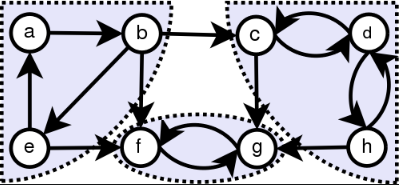
- 방향 그래프에서 서로 다른 임의의 두 정점 `u`, `v`에 대해서 `u` -> `v`와 `v` -> `u`로 가는 직/간접적인 경로가 모두 존재할 때 `u`와 `v`는 강하게 연결되어 있다고 한다.
- 강하게 연결돼어있는 요소들의 집합 중 가능한한 커야 한다. (maximal 해야 한다)
  - `{c, d}`는 서로의 정점으로 가는 경로가 있지만, 여기에 `h`을 추가해도 여전히 성질이 만족하므로, 이는 SCC가 아니다.
  - 즉, `{c, d, h}`만 SCC로 볼 수 있다.
- SCC는 사이클보다 상위 개념이다.
  - 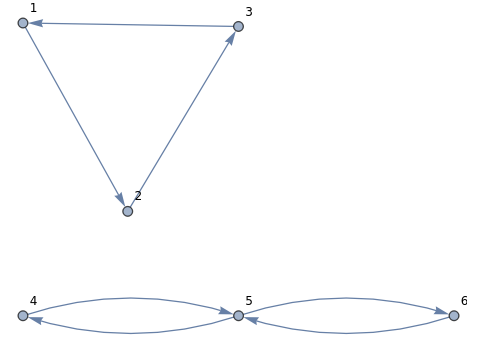
  - 여기서 `{1, 2, 3}`은 사이클이면서 SCC이지만, `{4, 5, 6}`은 SCC는 성립하지만 사이클이라고 볼 순 없다. 위의 `{c, d, h}`도 마찬가지.
- 선형시간인 $O(V+E)$만에 구할 수 있다.
- 주워진 방향 그래프가 DAG인지 확인할 때에도 사용할 수 있다.
  - 또한 그것의 위상정렬된 노드들을 구할 수 있다.

### 구현(Tarjan's)
- 한번의 DFS로 구하는 알고리즘.
- 순/역방향 간선과 교차간선을 구분해서 따진다.
  - 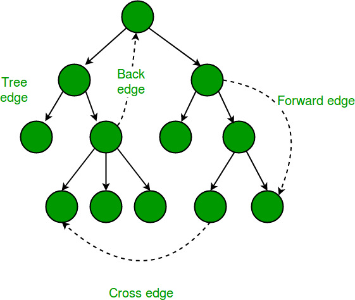
  - 순방향 간선은 DFS의 탐색 경로(트리경로)가 아니면서, 자신의 자손으로 가는 간선이다.
    - 자손의 방문이 모두 끝나야 순방향 간선에 접근할 수 있으므로, SCC를 구할 때 고려하지 않는다.
  - 역방향 간선은 트리경로가 아니면서, 자신의 조상으로 가는 간선이다.
    - 기본적으로 사이클을 의미한다.
    - `visited이면서 SCC에 아직 포함되지 않은` 간선이다.
  - 교차간선은 자식과 조상 관계에 있지 않으면서 연결된 간선이다.
    - 

In [ ]:
def tarjan(graph):
  SCC = [] 
  S = [] #DFS를 할때 사용할 스택
  depth = [0] * len(graph) #depth[i]는 노드 i의 DFS 탐색에서 처음 발견된 시간을 저장한다. 즉 DFS로 순회할 때의 방문 순서.

  # P tracks the node indices with the smallest discovery times that can be reached using zero or more outgoing edges and possibly one incoming edge.
  P = [] # 
 
  # The nodes for DFS traversal are initialized. We will go through every node even if our graph is not completely connected, 
  # to find every SCC.
  stack = [*range(len(graph))]

  while stack:
    node = stack.pop() 

    # When node < 0, it means we are on the return path of DFS. Now we check if this strongly connected component ends with 
    # the current node by comparing if there are any nodes in stack S which were discovered earlier than the root node of the SCC.
    if node < 0:
      d = depth[~node] - 1
      if P[-1] > d: 
        SCC.append(S[d:])
        del S[d:], P[-1]
        for node in SCC[-1]:
          depth[node] = -1

    # 해당 노드가 이미 방문되었고, 현재 탐색 경로에 속한다면
    elif depth[node] > 0:
      while P[-1] > depth[node]:
        P.pop()

    # If node is being visited for the first time.
    elif depth[node] == 0:
      S.append(node)
      P.append(len(S))
      depth[node] = len(S)
      stack.append(~node)
      stack += graph[node]

  return SCC[::-1]  # SCCs are returned in reverse order of their discovery